In [1]:
import os
import sqlite3
conn = sqlite3.connect(r"C:\Users\anish\Documents\PG Internship unofficial\Jagan unofficial intern\Elevate labs\T7\sales_data.db")
cursor = conn.cursor()

In [2]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sales',)]


In [3]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * amount) AS Revenue 
FROM sales 
GROUP BY product;
"""
cursor.execute(query)
columns = [desc[0] for desc in cursor.description]

rows = cursor.fetchall()

print(columns)
for row in rows:
    print(row)

['product', 'total_quantity', 'Revenue']
('bag', 2, 3200)
('chair', 2, 5000)
('cosmetics', 1, 1900)
('stationary', 6, 9600)
('table', 1, 2000)
('toys', 8, 20000)


In [4]:
cursor.execute("""
SELECT product, AVG(quantity) AS avg_quantity
FROM sales
GROUP BY product
""")
print(cursor.fetchall())

[('bag', 2.0), ('chair', 2.0), ('cosmetics', 1.0), ('stationary', 6.0), ('table', 1.0), ('toys', 8.0)]


In [5]:
import pandas as pd
df = pd.read_sql_query(query, conn)
print(df)

      product  total_quantity  Revenue
0         bag               2     3200
1       chair               2     5000
2   cosmetics               1     1900
3  stationary               6     9600
4       table               1     2000
5        toys               8    20000


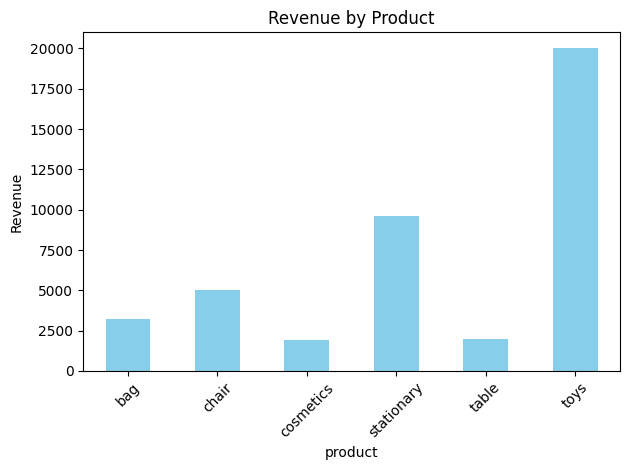

In [6]:
import matplotlib.pyplot as plt 

df1 = pd.read_sql_query("""
SELECT product, SUM(quantity * amount) AS revenue 
FROM sales 
GROUP BY product
""", conn)

df1.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()